##  THE SPARKS FOUNDATION

## TASK-1 Predict the percentage of an student based on the no. of study hours using Supervised ML

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

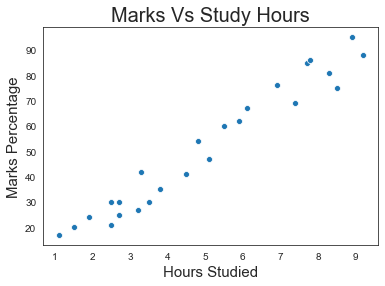

In [5]:
sns.set_style('white')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

In [ ]:
#Above scatter plot looks to be in correlation between the 'Marks Percentage' and 'Hours Studied',
#Let's plot a regression line to confirm the correlation...

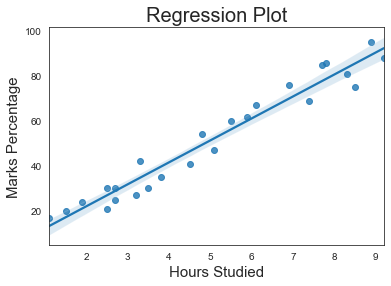

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()
print(data.corr())

In [7]:
#It is confirmed that the variables are positively correlated.

## Now will train the model

In [8]:
#1)Splitting the dataset

In [9]:
# Defining X and y from the Data
#iloc used for index bases slection
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
#
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [10]:
 #2) Fitting the Data into the model

In [11]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------I am Trained now---------")

---------I am Trained now---------


In [12]:
#3) Predicting the Percentage of Marks

In [13]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [15]:
#Comparing the Predicted Marks with the Actual Marks

In [16]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [17]:
#Visually Comparing the Predicted Marks with the Actual Marks

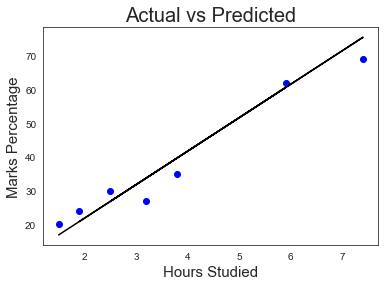

In [18]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

In [19]:
#Evaluating the Model¶

In [20]:
# Calculating the accuracy of the model
#NOTE - Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


In [21]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(answer))

Score = [93.89272889]


In [22]:
#According to the model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

## THANK YOU